#Dashboard: Analysis for Reviews Data
Dikerjakan dalam rangka menyelesaikan Tugas Besar Basis Data dan Pemrograman SQL untuk Big Data

Dibuat oleh:

*   Ni Luh Melika Candra Widyani Mas (6181901065)
*   Almatiara Levi Utami (6181901069)




Dataset yang digunakan:


*   amazon_apparel_reviews.csv
*   amazon_beauty_reviews.csv
*   amazon_jewelry_reviews.csv
*   amazon_shoes_reviews.csv
*   drug_reviews.csv




#Tujuan:
Pada tugas ini ada beberapa hal yang ingin dicapai. Dengan melakukan hal ini ingin dibuat OLAP (Online Analytical Processing) di mana adanya kecepatan laporan analisis. Berikut adalah hal-hal yang ingin dicapai atau ditampilkan :

*   Mengetahui rata-rata rating pada masing-masing kategori produk
*   Mengetahui 10 tertinggi jumlah vote review untuk masing-masing barang
*   Mengetahui kata-kata yang paling banyak muncul pada review untuk masing-masing kategori
*   Mengetahui jumlah produk yang direview pada masing-masing kategori
*   Mengetahui banyaknya jumlah review yang dilakukan per harinya dalam satuan minggu













Dimension dan Fact Table
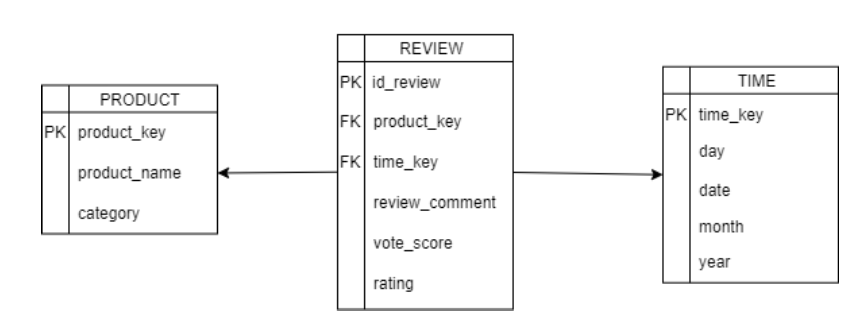

#Langkah-langkah Program

Mengimport library yang digunakan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql
#import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

Menyambungkan program dengan database mysql

In [7]:
connection = pymysql.connect(host="localhost", 
                             port=3307, 
                             user="root", 
                             passwd="melikacantik", database="tubes_basdat")
cursor = connection.cursor()

Mengambil data yang ada di dimension dan fact table

In [8]:
cursor.execute("select * from review_table")
review_table = cursor.fetchall()
cursor.execute("select * from product_table")
product_table = cursor.fetchall()
cursor.execute("select * from time_table")
time_table = cursor.fetchall()


#Hasil Visualisasi


**Dashboard 1: Mencari rata-rata rating perkategori**

In [9]:
cursor.execute("select * from average_rating_dashboard")
average_rating_dahsboard = cursor.fetchall()

In [70]:
category_1 = []
for value in average_rating_dahsboard:
    category_1.append(value[0])

average_rating_1 = []
for value in average_rating_dahsboard:
    average_rating_1.append(value[1])

data={'category':category_1,'rating':average_rating_1}
df_1=pd.DataFrame(data)



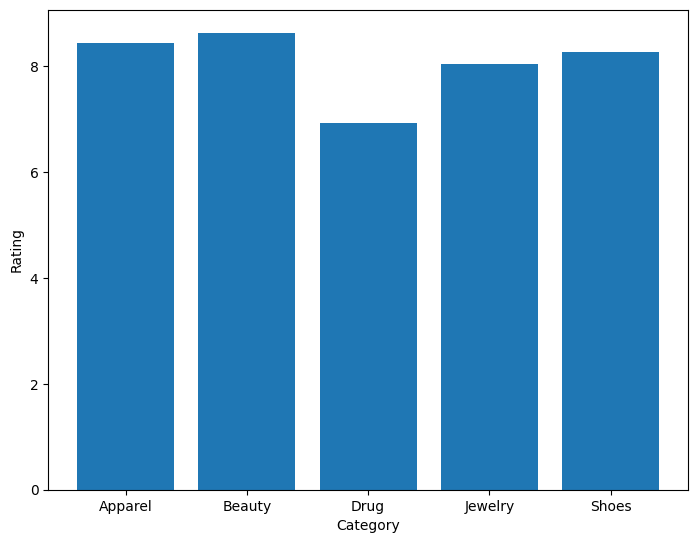

In [71]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Category')
ax.set_ylabel('Rating')

#yang y duluan baru x
ax.bar(df_1['category'], df_1['rating'])
plt.show()


Berdasarkan hasil yang didapatkan untuk rata-rata rating tertinggi ada pada produk kecantikan dan yang terendah ada pada produk obat-obatan. 

**Dashboard 2: Mencari 10 produk dengan *vote_score* tertinggi**

In [106]:
cursor.execute("select * from vote_score_dashboard")
vote_score_dashboard = cursor.fetchall()

In [107]:
nama_product = []
for value in vote_score_dashboard:
    nama_product.append(value[0])

category = []
for value in vote_score_dashboard:
    category.append(value[1])

vote_score = []
for value in vote_score_dashboard:
    vote_score.append(value[2])

data={'product':nama_product,'category':category,'vote_score':vote_score}
df_2=pd.DataFrame(data)

In [108]:
df_2

product category  vote_score
0                  Guanfacine     Drug         192
1                  Effexor XR     Drug         166
2                      Cialis     Drug         132
3                   Estradiol     Drug         128
4               Buprenorphine     Drug         125
5  Phillips' Milk of Magnesia     Drug         120
6                Eflornithine     Drug          99
7     Ledipasvir / sofosbuvir     Drug          94
8                  Alprazolam     Drug          87
9                       Mobic     Drug          82

Berdasarkan hasil ini didapatkan produk-produk dengan kategori Drug atau obat-obatan mendominasi dengan jumlah vote tertinggi.

**Dashboard 3: Mencari Kata pada Review yang Paling Sering Muncul di Seluruh Produk dan di Setiap Kategori Produk menggunakan Word Cloud**

In [118]:
cursor.execute("select * from category_review_dashboard")
category_review_dashboard = cursor.fetchall()

In [119]:
apparel = ""
drug = ""
shoes = ""
beauty = ""
jewelry = ""

for value in category_review_dashboard:
    if(value[0] == 'Apparel'):
        apparel+= value[1]
    if(value[0] == 'Drug'):
        drug+= value[1]
    if(value[0] == 'Shoes'):
        shoes+= value[1]
    if(value[0] == 'Beauty'):
        beauty+= value[1]
    if(value[0] == 'Jewelry'):
        jewelry += value[1]


**Hasil Word Cloud dari seluruh Review Produk**


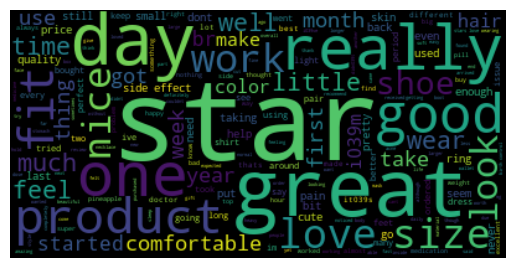

In [117]:
wordcloud_all = WordCloud().generate(apparel+drug+shoes+beauty+jewelry)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan hasil didapatkan dari data keseluruhan lewat kata-kata yang muncul pada word cloud ini menunjukkan hasil review yang positif yang didasari oleh kemunculan kata tertentu. Kata tersebut seperti great, good, comfortable dan lainnya.


**Hasil Word Cloud dari Review Produk Pakaian (*Apparel*)**

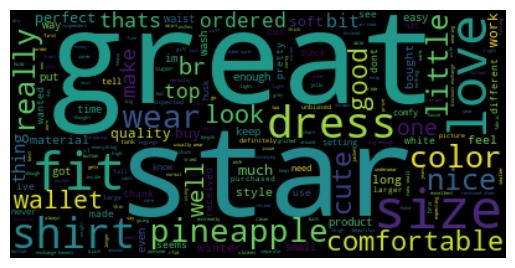

In [131]:
wordcloud_apparel = WordCloud().generate(apparel)
plt.imshow(wordcloud_apparel, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori apparel didapati kata-kata positif juga mendominasi seperti great, love, fit dan lain sebagainya. Hal ini menandakan produk-produk berkategori apparel ini memiliki review yang positif.


**Hasil Word Cloud dari Review Produk Sepatu (*Shoes*)**

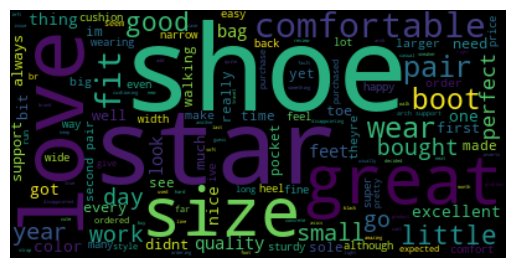

In [132]:
wordcloud_shoes = WordCloud().generate(shoes)
plt.imshow(wordcloud_shoes, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori shoes didapati kata-kata positif juga mendominasi seperti great, perfect, love dan lain sebagainya. Hal ini menandakan produk-produk berkategori shoes ini memiliki review yang positif.


**Hasil Word Cloud dari Review Produk Perhiasan (*Jewelry*)**

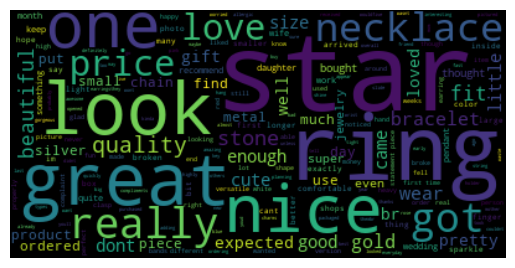

In [133]:
wordcloud_jewelry = WordCloud().generate(jewelry)
plt.imshow(wordcloud_jewelry, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori jewelry didapati kata-kata positif juga mendominasi seperti cute, nice, beautiful, great dan lain sebagainya. Hal ini menandakan produk-produk berkategori jewelry ini memiliki review yang positif. Barang yang terjual juga muncul katanya seperti necklace dan ring.


**Hasil Word Cloud dari Review Produk Kosmetik (*Beauty*)**

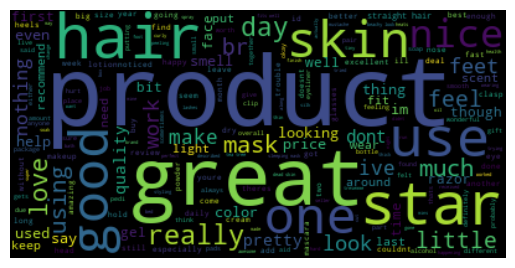

In [134]:
wordcloud_beauty = WordCloud().generate(beauty)
plt.imshow(wordcloud_beauty, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori beauty didapati kata-kata positif juga mendominasi seperti great, love, fit dan lain sebagainya. Hal ini menandakan produk-produk berkategori beauty ini memiliki review yang positif.

**Hasil Word Cloud dari Review Produk Obat-obatan (*Drug*)**

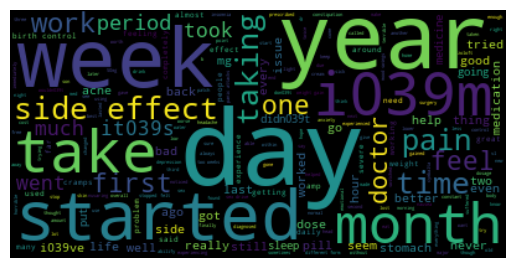

In [135]:
wordcloud_drug = WordCloud().generate(drug)
plt.imshow(wordcloud_drug, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori drug didapati kata-kata positif juga mendominasi seperti better dan lain sebagainya. Tetapi untuk kata-kata yang dominan muncul adalah seperti yang menandakan waktu atau periode seperti week, day, year dan month. Selain itu juga ada kata yang menonjol yaitu side effect.

**Dashboard 4: Mencari Jumlah Produk per Kategori**

In [136]:
cursor.execute("select * from product_category_dashboard")
product_category_dashboard = cursor.fetchall()

In [138]:
category = []
for value in product_category_dashboard:
    category.append(value[0])

product_name = []
for value in product_category_dashboard:
    product_name.append(value[1])

data={'category':category,'banyak_product':product_name}
df_3=pd.DataFrame(data)

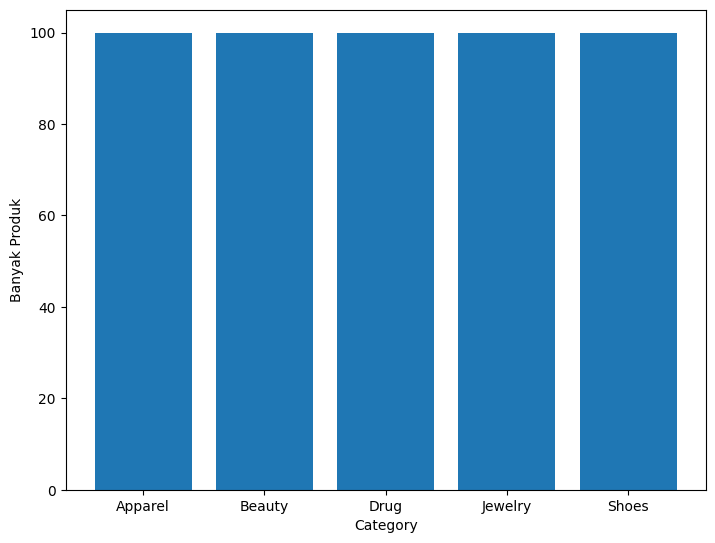

In [139]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Category')
ax.set_ylabel('Banyak Produk')

#yang y duluan baru x
ax.bar(df_3['category'], df_3['banyak_product'])
plt.show()

Berdasarkan hasil ini didapatkan produk-produk dengan berbagai kategori yang berbeda memiliki banyak produk yang sama.


**Dashboard 4: Mencari Tren Waktu Review per Hari**

In [140]:
cursor.execute("select * from day_review_dashboard")
day_review_dashboard = cursor.fetchall()

In [141]:
day = []
for value in day_review_dashboard:
    day.append(value[0])

count_review = []
for value in day_review_dashboard:
    count_review.append(value[1])

data={'day':day,'count_review':count_review}
df=pd.DataFrame(data)


In [142]:
data_2 = data={'day':['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday'],
'count_review': [11, 314, 16, 13, 25, 110, 11]}

df_4 = pd.DataFrame(data_2)

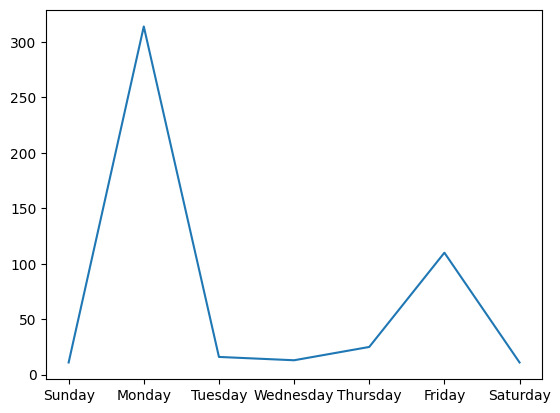

In [143]:
plt.plot(df_4['day'], df_4['count_review'])
plt.show()


Berdasarkan hasil ini didapatkan jumlah review yang terbanyak ada pada hari Senin dan Jumat.


Text(0.5, 1.0, 'Tren Review Hari ke Hari')

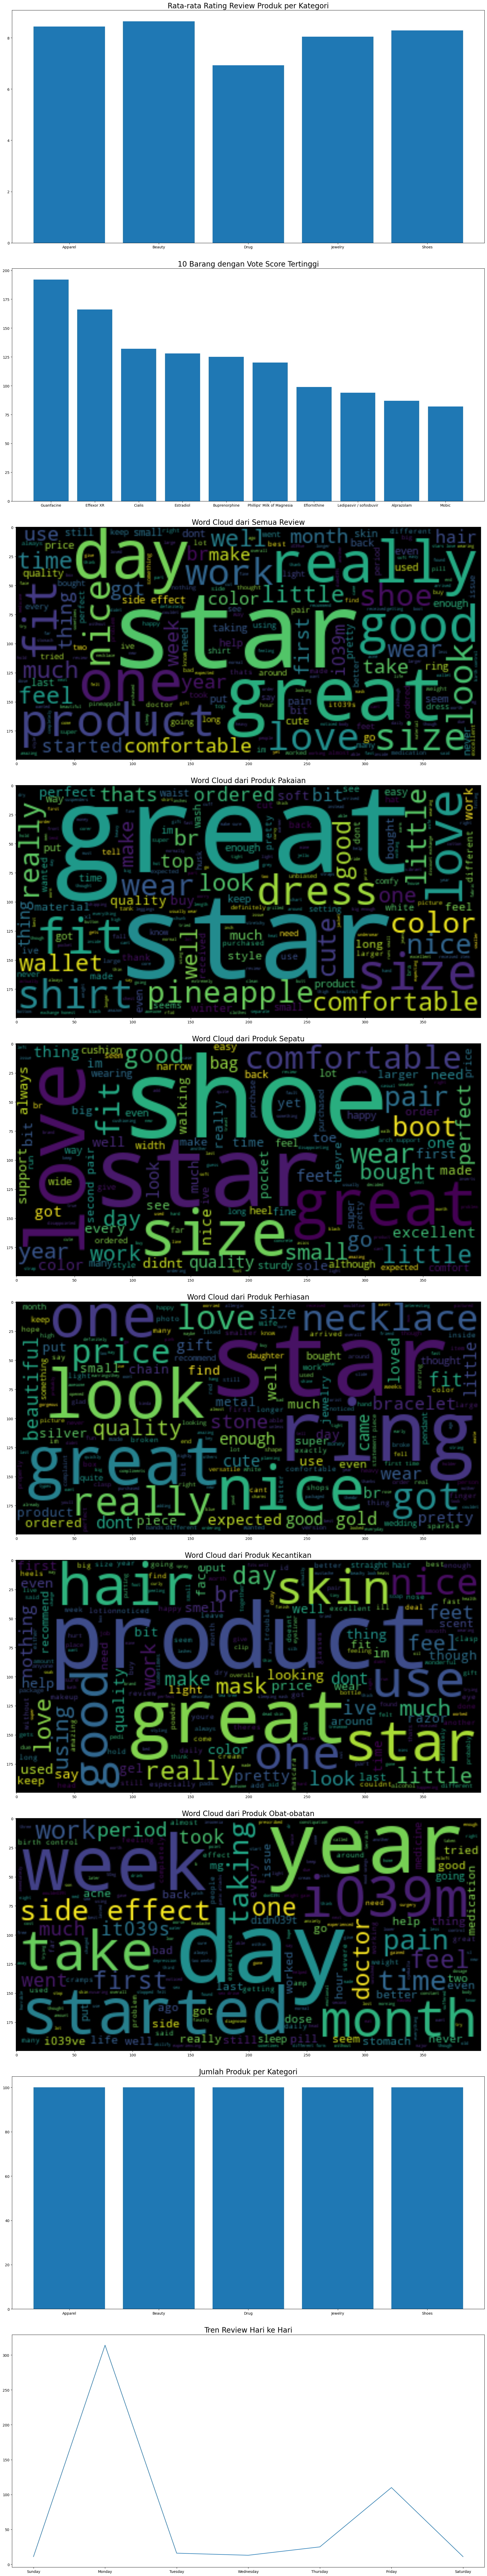

In [159]:
figure, axis = plt.subplots(10,  figsize=(20, 100))
figure.tight_layout(pad=5.0)
 
axis[0].bar(df_1['category'], df_1['rating'])
axis[0].set_title("Rata-rata Rating Review Produk per Kategori", fontsize=20)

axis[1].bar(df_2['product'],df_2['vote_score'])
axis[1].set_title("10 Barang dengan Vote Score Tertinggi", fontsize=20)

axis[2].imshow(wordcloud_all, interpolation='bilinear')
axis[2].set_title("Word Cloud dari Semua Review", fontsize=20)

axis[3].imshow(wordcloud_apparel, interpolation='bilinear')
axis[3].set_title("Word Cloud dari Produk Pakaian", fontsize=20)

axis[4].imshow(wordcloud_shoes, interpolation='bilinear')
axis[4].set_title("Word Cloud dari Produk Sepatu", fontsize=20)

axis[5].imshow(wordcloud_jewelry, interpolation='bilinear')
axis[5].set_title("Word Cloud dari Produk Perhiasan", fontsize=20)

axis[6].imshow(wordcloud_beauty, interpolation='bilinear')
axis[6].set_title("Word Cloud dari Produk Kecantikan", fontsize=20)

axis[7].imshow(wordcloud_drug, interpolation='bilinear')
axis[7].set_title("Word Cloud dari Produk Obat-obatan", fontsize=20)


axis[8].bar(df_3['category'], df_3['banyak_product'])
axis[8].set_title("Jumlah Produk per Kategori", fontsize=20)



axis[9].plot(df_4['day'], df_4['count_review'])
axis[9].set_title("Tren Review Hari ke Hari", fontsize=20)
# axis[4,4].bar([1,2],[2,3])
# axis[4,4].set_title(fontsize=20, "10 Barang dengan Vote Score Tertinggi")


